# Expreriment Report

In [1]:
import sys
sys.path.append("../moviesCLF/")

In [2]:
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, SpatialDropout1D, Lambda
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.backend import expand_dims
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import TruncatedSVD, NMF
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

from sklearn.multiclass import OneVsRestClassifier

from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

import pandas as pd
import numpy as np

from utility_functions import *
# nltk.download()

Using TensorFlow backend.


In [3]:
def get_categories(df):
    return list(set([genre for genres in df['genre'].values for genre in genres.split(',') if genre in df.columns] ))

movies_df = pd.read_csv('../data/movieDB_clean.csv')

train = pd.read_csv('../data/movieDB_clean_train.csv')
test = pd.read_csv('../data/movieDB_clean_test.csv')

categories = get_categories(movies_df)

y_train = train[categories]
y_test = test[categories]
y_train.shape, y_test.shape

((2933, 12), (749, 12))

In [4]:
# Word2Vec
model_file = '../models/w2v_movie_plot.model_2'
w2v_model = Word2Vec.load(model_file)
w2v_x_train, w2v_x_test = w2v_feature_selection(train, test, w2v_model)

Started Word2Vec feature selection...
Finished Word2Vec feature selection in:  0:01:39.400023


In [5]:
#weighted word2vec
ww2v_x_train, ww2v_x_test = weighted_w2v_feature_selection(train, test, w2v_model)

Started Weighted Word2Vec feature selection...
Started TF-IDF vectorization...
Finished TF-IDF vectorizing in:  0:00:01.296302
Started TF-IDF vectorization...
Finished TF-IDF vectorizing in:  0:00:00.312483
Finished Weighted Word2Vec feature selection in:  0:01:13.563090


In [6]:
# tfidf
tfidf_x_train, tfidf_x_test = tfidf_feature_selection(train, test)

Started TF-IDF feature selection
Started TF-IDF vectorization...
Finished TF-IDF vectorizing in:  0:00:01.278240
Finished TF-IDF feature selection in:  0:01:10.537303


In [7]:
# lda
lda_x_train, lda_x_test = lda_feature_selection(train, test, len(categories))

Simple Latent Dirichlet Allocation...
Started TF-IDF feature selection
Started TF-IDF vectorization...
Finished TF-IDF vectorizing in:  0:00:01.357299
Finished TF-IDF feature selection in:  0:01:16.184254
Finished Latent Dirichlet Allocation in:  0:02:55.622236


## Logistic Reggression

#### TF-IDF

In [41]:
from sklearn.linear_model import LogisticRegression
print("")
print("Starting Logistic Regression classifiers...")
print("")
start = datetime.now()
pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(max_iter=1000, multi_class='ovr')))
            ])

parameters = [
            {
'clf__estimator__solver': ('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'),
'clf__estimator__multi_class': ('ovr', 'auto')
            }
         ]
grid_search_cv = GridSearchCV(pipeline, parameters, cv=2, n_jobs=-1)
grid_search_cv.fit(tfidf_x_train, y_train)

best_clf = grid_search_cv.best_estimator_
y_pred = best_clf.predict(tfidf_x_test)
printScores('Logistic_tfidf', y_test, y_pred)
print('Finished training in : ', datetime.now()-start) 
best_clf.get_params()


Starting Logistic Regression classifiers...

                         Accuracy  Precision  Recall  F1-Score  Support
Θρίλερ                       0.81       1.00    0.03      0.05    145.0
Οικογενειακή                 0.93       1.00    0.04      0.08     51.0
Αισθηματική                  0.84       0.85    0.13      0.23    131.0
Φαντασίας                    0.00       0.00    0.00      0.00    125.0
Δραματικό Θρίλερ             0.00       0.00    0.00      0.00    162.0
Εποχής                       0.82       0.75    0.10      0.18    145.0
Δραμεντί                     0.00       0.00    0.00      0.00    158.0
Δράσης                       0.91       0.79    0.25      0.38     87.0
Δραματική                    0.71       0.55    0.19      0.28    223.0
Επιστημονικής Φαντασίας      0.87       0.75    0.03      0.06     96.0
Κωμωδία                      0.89       0.50    0.10      0.16     83.0
Περιπέτεια                   0.88       0.80    0.27      0.41    117.0
Avg/Total         

{'memory': None,
 'steps': [('clf',
   OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                    dual=False, fit_intercept=True,
                                                    intercept_scaling=1,
                                                    l1_ratio=None, max_iter=1000,
                                                    multi_class='ovr', n_jobs=None,
                                                    penalty='l2',
                                                    random_state=None,
                                                    solver='newton-cg', tol=0.0001,
                                                    verbose=0, warm_start=False),
                       n_jobs=None))],
 'verbose': False,
 'clf': OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                  dual=False, fit_intercept=True,
                                     

#### TF-IDF with Latent Dirichlet Allocation

In [42]:
from sklearn.linear_model import LogisticRegression
print("")
print("Starting Logistic Regression classifiers...")
print("")
start = datetime.now()
pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(max_iter=1000, multi_class='ovr')))
            ])

parameters = [
            {
'clf__estimator__solver': ('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'),
'clf__estimator__multi_class': ('ovr', 'auto')
            }
         ]
grid_search_cv = GridSearchCV(pipeline, parameters, cv=2, n_jobs=-1)
grid_search_cv.fit(lda_x_train, y_train)

best_clf = grid_search_cv.best_estimator_
y_pred = best_clf.predict(lda_x_test)
printScores('Logistic_lda', y_test, y_pred)
print('Finished training in : ', datetime.now()-start) 
best_clf.get_params()


Starting Logistic Regression classifiers...

                         Accuracy  Precision  Recall  F1-Score  Support
Θρίλερ                       0.82       0.83    0.07      0.13    145.0
Οικογενειακή                 0.93       1.00    0.04      0.08     51.0
Αισθηματική                  0.85       0.78    0.16      0.27    131.0
Φαντασίας                    0.83       0.50    0.01      0.02    125.0
Δραματικό Θρίλερ             0.00       0.00    0.00      0.00    162.0
Εποχής                       0.82       0.69    0.12      0.21    145.0
Δραμεντί                     0.00       0.00    0.00      0.00    158.0
Δράσης                       0.91       0.81    0.33      0.47     87.0
Δραματική                    0.71       0.56    0.20      0.30    223.0
Επιστημονικής Φαντασίας      0.88       0.91    0.10      0.19     96.0
Κωμωδία                      0.89       0.50    0.10      0.16     83.0
Περιπέτεια                   0.88       0.76    0.33      0.46    117.0
Avg/Total         

{'memory': None,
 'steps': [('clf',
   OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                    dual=False, fit_intercept=True,
                                                    intercept_scaling=1,
                                                    l1_ratio=None, max_iter=1000,
                                                    multi_class='ovr', n_jobs=None,
                                                    penalty='l2',
                                                    random_state=None,
                                                    solver='liblinear', tol=0.0001,
                                                    verbose=0, warm_start=False),
                       n_jobs=None))],
 'verbose': False,
 'clf': OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                  dual=False, fit_intercept=True,
                                     

#### Word2Vec

In [43]:
from sklearn.linear_model import LogisticRegression
print("")
print("Starting Logistic Regression classifiers...")
print("")
start = datetime.now()
pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(max_iter=1000, multi_class='ovr')))
            ])

parameters = [
            {
'clf__estimator__solver': ('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'),
'clf__estimator__multi_class': ('ovr', 'auto')
            }
         ]
grid_search_cv = GridSearchCV(pipeline, parameters, cv=2, n_jobs=-1)
grid_search_cv.fit(w2v_x_train, y_train)

best_clf = grid_search_cv.best_estimator_
y_pred = best_clf.predict(w2v_x_test)
printScores('Logistic_w2v', y_test, y_pred)
print('Finished training in : ', datetime.now()-start) 
best_clf.get_params()


Starting Logistic Regression classifiers...



/home/arvartho/python/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/arvartho/python/lib/python3.7/site-packages/sklearn/utils/optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
/home/arvartho/python/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/arvartho/python/lib/python3.7/site-packages/sklearn/utils/optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
/home/arvartho/python/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/arvartho/python/lib/python3.7/site-pac

/home/arvartho/python/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/arvartho/python/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/arvartho/python/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/arvartho/python/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/arvartho/python/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reac

/home/arvartho/python/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/arvartho/python/lib/python3.7/site-packages/sklearn/utils/optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
/home/arvartho/python/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/arvartho/python/lib/python3.7/site-packages/sklearn/utils/optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
/home/arvartho/python/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/arvartho/python/lib/python3.7/site-pac

/home/arvartho/python/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/arvartho/python/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/arvartho/python/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/arvartho/python/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/arvartho/python/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reac

                         Accuracy  Precision  Recall  F1-Score  Support
Θρίλερ                       0.79       0.34    0.08      0.13    145.0
Οικογενειακή                 0.92       0.27    0.08      0.12     51.0
Αισθηματική                  0.82       0.39    0.08      0.14    131.0
Φαντασίας                    0.83       0.36    0.06      0.11    125.0
Δραματικό Θρίλερ             0.78       0.25    0.01      0.01    162.0
Εποχής                       0.79       0.35    0.10      0.15    145.0
Δραμεντί                     0.77       0.23    0.04      0.07    158.0
Δράσης                       0.87       0.43    0.29      0.34     87.0
Δραματική                    0.66       0.31    0.11      0.16    223.0
Επιστημονικής Φαντασίας      0.87       0.47    0.16      0.23     96.0
Κωμωδία                      0.86       0.22    0.10      0.13     83.0
Περιπέτεια                   0.81       0.34    0.21      0.26    117.0
Avg/Total                    0.79       0.33    0.10      0.15  

/home/arvartho/python/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


{'memory': None,
 'steps': [('clf',
   OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                    dual=False, fit_intercept=True,
                                                    intercept_scaling=1,
                                                    l1_ratio=None, max_iter=1000,
                                                    multi_class='ovr', n_jobs=None,
                                                    penalty='l2',
                                                    random_state=None,
                                                    solver='saga', tol=0.0001,
                                                    verbose=0, warm_start=False),
                       n_jobs=None))],
 'verbose': False,
 'clf': OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                  dual=False, fit_intercept=True,
                                          

#### Weighted Word2Vec

In [44]:
from sklearn.linear_model import LogisticRegression
print("")
print("Starting Logistic Regression classifiers...")
print("")
start = datetime.now()
pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(max_iter=1000, multi_class='ovr')))
            ])

parameters = [
            {
'clf__estimator__solver': ('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'),
'clf__estimator__multi_class': ('ovr', 'auto')
            }
         ]
grid_search_cv = GridSearchCV(pipeline, parameters, cv=2, n_jobs=-1)
grid_search_cv.fit(ww2v_x_train, y_train)

best_clf = grid_search_cv.best_estimator_
y_pred = best_clf.predict(ww2v_x_test)
printScores('Logistic_ww2v', y_test, y_pred)
print('Finished training in : ', datetime.now()-start) 
best_clf.get_params()


Starting Logistic Regression classifiers...



/home/arvartho/python/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/arvartho/python/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/arvartho/python/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/arvartho/python/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/arvartho/python/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which 

/home/arvartho/python/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/arvartho/python/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/arvartho/python/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/arvartho/python/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/arvartho/python/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reac

/home/arvartho/python/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/arvartho/python/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/arvartho/python/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/arvartho/python/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/arvartho/python/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reac

                         Accuracy  Precision  Recall  F1-Score  Support
Θρίλερ                       0.80       0.48    0.29      0.36    145.0
Οικογενειακή                 0.90       0.29    0.29      0.29     51.0
Αισθηματική                  0.81       0.45    0.31      0.37    131.0
Φαντασίας                    0.85       0.62    0.29      0.39    125.0
Δραματικό Θρίλερ             0.78       0.41    0.07      0.13    162.0
Εποχής                       0.82       0.55    0.34      0.42    145.0
Δραμεντί                     0.79       0.51    0.23      0.32    158.0
Δράσης                       0.89       0.51    0.36      0.42     87.0
Δραματική                    0.69       0.49    0.44      0.46    223.0
Επιστημονικής Φαντασίας      0.88       0.55    0.45      0.49     96.0
Κωμωδία                      0.87       0.40    0.29      0.34     83.0
Περιπέτεια                   0.86       0.57    0.47      0.51    117.0
Avg/Total                    0.81       0.49    0.32      0.38  

{'memory': None,
 'steps': [('clf',
   OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                    dual=False, fit_intercept=True,
                                                    intercept_scaling=1,
                                                    l1_ratio=None, max_iter=1000,
                                                    multi_class='ovr', n_jobs=None,
                                                    penalty='l2',
                                                    random_state=None,
                                                    solver='newton-cg', tol=0.0001,
                                                    verbose=0, warm_start=False),
                       n_jobs=None))],
 'verbose': False,
 'clf': OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                  dual=False, fit_intercept=True,
                                     

## MultiNomial Bayes
#### TF-IDF

In [8]:
print("")
print("Starting Bayes classifiers...")
print("")
start = datetime.now()
pipeline = Pipeline([
                ('clf', OneVsRestClassifier(MultinomialNB(class_prior=None)))
            ])

parameters = [
            {
            'clf__estimator__alpha': (0.001, 0.01, 0.4, 0.8, 1),
            'clf__estimator__fit_prior': (True,False)
            }
         ]
grid_search_cv = GridSearchCV(pipeline, parameters, cv=2, n_jobs=-1)
grid_search_cv.fit(tfidf_x_train, y_train)

best_clf = grid_search_cv.best_estimator_
y_pred = best_clf.predict(tfidf_x_test)
printScores('MultiBayes_tfidf', y_test, y_pred)
print('Finished training in : ', datetime.now()-start) 
best_clf.get_params()


Starting Bayes classifiers...

                         Accuracy  Precision  Recall  F1-Score  Support
Θρίλερ                       0.80       0.49    0.54      0.51    145.0
Οικογενειακή                 0.89       0.28    0.43      0.34     51.0
Αισθηματική                  0.76       0.37    0.56      0.45    131.0
Φαντασίας                    0.85       0.55    0.45      0.50    125.0
Δραματικό Θρίλερ             0.74       0.36    0.28      0.31    162.0
Εποχής                       0.78       0.44    0.48      0.46    145.0
Δραμεντί                     0.70       0.35    0.47      0.40    158.0
Δράσης                       0.88       0.49    0.75      0.59     87.0
Δραματική                    0.66       0.46    0.65      0.54    223.0
Επιστημονικής Φαντασίας      0.87       0.50    0.47      0.48     96.0
Κωμωδία                      0.81       0.30    0.55      0.39     83.0
Περιπέτεια                   0.85       0.51    0.65      0.57    117.0
Avg/Total                    0.7

#### TF-IDF with Latent Dirichlet Allocation

In [9]:
print("")
print("Starting Bayes classifiers...")
print("")
start = datetime.now()
pipeline = Pipeline([
                ('clf', OneVsRestClassifier(MultinomialNB(class_prior=None)))
            ])

parameters = [
            {
            'clf__estimator__alpha': (0.001, 0.01, 0.4, 0.8, 1),
            'clf__estimator__fit_prior': (True,False)
            }
         ]
grid_search_cv = GridSearchCV(pipeline, parameters, cv=2, n_jobs=-1)
grid_search_cv.fit(lda_x_train, y_train)

best_clf = grid_search_cv.best_estimator_
y_pred = best_clf.predict(lda_x_test)
printScores('MultiBayes_lda', y_test, y_pred)
print('Finished training in : ', datetime.now()-start) 
best_clf.get_params()


Starting Bayes classifiers...

                         Accuracy  Precision  Recall  F1-Score  Support
Θρίλερ                       0.81       0.50    0.55      0.53    145.0
Οικογενειακή                 0.89       0.28    0.43      0.34     51.0
Αισθηματική                  0.75       0.37    0.56      0.45    131.0
Φαντασίας                    0.85       0.54    0.45      0.49    125.0
Δραματικό Θρίλερ             0.74       0.36    0.27      0.31    162.0
Εποχής                       0.77       0.42    0.48      0.45    145.0
Δραμεντί                     0.71       0.37    0.51      0.43    158.0
Δράσης                       0.88       0.48    0.74      0.58     87.0
Δραματική                    0.65       0.44    0.64      0.52    223.0
Επιστημονικής Φαντασίας      0.88       0.54    0.51      0.52     96.0
Κωμωδία                      0.81       0.30    0.54      0.39     83.0
Περιπέτεια                   0.85       0.52    0.66      0.58    117.0
Avg/Total                    0.7

##  Linear SVM
#### TF-IDF

In [10]:
print("")
print("Starting Bayes classifiers...")
print("")
start = datetime.now()
pipeline = Pipeline([
            ('clf', OneVsRestClassifier(LinearSVC(), n_jobs=-1)),
            ])

# In order to obtain the parameters we used pipeline.get_params().keys()
parameters = [
            {
            'clf__estimator__class_weight': ['balanced'],
            }
         ]
grid_search_cv = GridSearchCV(pipeline, parameters, cv=2, n_jobs=-1)
grid_search_cv.fit(tfidf_x_train, y_train)

best_clf = grid_search_cv.best_estimator_
y_pred = best_clf.predict(tfidf_x_test)
printScores('LinearSVC_tfidf', y_test, y_pred)
print('Finished training in : ', datetime.now()-start) 
best_clf.get_params()


Starting Bayes classifiers...

                         Accuracy  Precision  Recall  F1-Score  Support
Θρίλερ                       0.78       0.45    0.51      0.48    145.0
Οικογενειακή                 0.88       0.25    0.41      0.31     51.0
Αισθηματική                  0.80       0.43    0.53      0.48    131.0
Φαντασίας                    0.83       0.50    0.42      0.46    125.0
Δραματικό Θρίλερ             0.73       0.31    0.19      0.24    162.0
Εποχής                       0.79       0.45    0.51      0.48    145.0
Δραμεντί                     0.70       0.32    0.36      0.34    158.0
Δράσης                       0.88       0.48    0.66      0.56     87.0
Δραματική                    0.67       0.46    0.58      0.52    223.0
Επιστημονικής Φαντασίας      0.88       0.54    0.50      0.52     96.0
Κωμωδία                      0.80       0.28    0.51      0.36     83.0
Περιπέτεια                   0.84       0.48    0.63      0.55    117.0
Avg/Total                    0.7

#### TF-IDF with Latent Dirichlet Allocation

In [11]:
print("")
print("Starting Bayes classifiers...")
print("")
start = datetime.now()
pipeline = Pipeline([
            ('clf', OneVsRestClassifier(LinearSVC(max_iter=2000), n_jobs=-1)),
            ])

    # In order to obtain the parameters we used pipeline.get_params().keys()
parameters = [
                {
                'clf__estimator__class_weight': ['balanced'],
                }
             ]
grid_search_cv = GridSearchCV(pipeline, parameters, cv=2, n_jobs=-1)
grid_search_cv.fit(lda_x_train, y_train)

best_clf = grid_search_cv.best_estimator_
y_pred = best_clf.predict(lda_x_test)
printScores('LinearSVC_lda', y_test, y_pred)
print('Finished training in : ', datetime.now()-start) 
best_clf.get_params()


Starting Bayes classifiers...

                         Accuracy  Precision  Recall  F1-Score  Support
Θρίλερ                       0.79       0.46    0.50      0.48    145.0
Οικογενειακή                 0.88       0.26    0.41      0.32     51.0
Αισθηματική                  0.81       0.45    0.54      0.49    131.0
Φαντασίας                    0.83       0.50    0.42      0.46    125.0
Δραματικό Θρίλερ             0.72       0.28    0.18      0.22    162.0
Εποχής                       0.79       0.45    0.50      0.47    145.0
Δραμεντί                     0.70       0.33    0.38      0.35    158.0
Δράσης                       0.88       0.49    0.67      0.57     87.0
Δραματική                    0.66       0.44    0.56      0.49    223.0
Επιστημονικής Φαντασίας      0.89       0.57    0.53      0.55     96.0
Κωμωδία                      0.80       0.27    0.51      0.35     83.0
Περιπέτεια                   0.84       0.48    0.61      0.54    117.0
Avg/Total                    0.7

#### Word2Vec

In [12]:
print("")
print("Starting Bayes classifiers...")
print("")
start = datetime.now()
pipeline = Pipeline([
            ('clf', OneVsRestClassifier(LinearSVC(max_iter=2000), n_jobs=-1)),
            ])

    # In order to obtain the parameters we used pipeline.get_params().keys()
parameters = [
                {
                'clf__estimator__class_weight': ['balanced'],
                }
             ]
grid_search_cv = GridSearchCV(pipeline, parameters, cv=2, n_jobs=-1)
grid_search_cv.fit(w2v_x_train, y_train)

best_clf = grid_search_cv.best_estimator_
y_pred = best_clf.predict(w2v_x_test)
printScores('LinearSVC_w2v', y_test, y_pred)
print('Finished training in : ', datetime.now()-start) 
best_clf.get_params()


Starting Bayes classifiers...



/home/arvartho/python/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/arvartho/python/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/arvartho/python/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/arvartho/python/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/arvartho/python/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iteratio

                         Accuracy  Precision  Recall  F1-Score  Support
Θρίλερ                       0.70       0.27    0.33      0.30    145.0
Οικογενειακή                 0.76       0.08    0.24      0.12     51.0
Αισθηματική                  0.69       0.20    0.24      0.22    131.0
Φαντασίας                    0.66       0.15    0.22      0.18    125.0
Δραματικό Θρίλερ             0.71       0.22    0.14      0.17    162.0
Εποχής                       0.67       0.21    0.25      0.22    145.0
Δραμεντί                     0.67       0.25    0.27      0.26    158.0
Δράσης                       0.79       0.21    0.30      0.25     87.0
Δραματική                    0.57       0.32    0.41      0.36    223.0
Επιστημονικής Φαντασίας      0.81       0.24    0.25      0.25     96.0
Κωμωδία                      0.73       0.15    0.33      0.21     83.0
Περιπέτεια                   0.69       0.22    0.40      0.29    117.0
Avg/Total                    0.69       0.23    0.29      0.25  

/home/arvartho/python/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


#### Weighted Word2Vec

print("")
print("Starting Bayes classifiers...")
print("")
start = datetime.now()
pipeline = Pipeline([
            ('clf', OneVsRestClassifier(LinearSVC(max_iter=2000), n_jobs=-1)),
            ])

    # In order to obtain the parameters we used pipeline.get_params().keys()
parameters = [
                {
                'clf__estimator__class_weight': ['balanced'],
                }
             ]
grid_search_cv = GridSearchCV(pipeline, parameters, cv=2, n_jobs=-1)
grid_search_cv.fit(ww2v_x_train, y_train)

best_clf = grid_search_cv.best_estimator_
y_pred = best_clf.predict(ww2v_x_test)
printScores('LinearSVC_ww2v', y_test, y_pred)
print('Finished training in : ', datetime.now()-start) 
best_clf.get_params()

#### TF-IDF

In [14]:
print("")
print("Starting RBF SVM classifiers...")
print("")
start = datetime.now()
categories = get_categories(movies_df)
probThresh = getProbThresh(movies_df[categories], threshSel=1)

pipeline = Pipeline([
            ('clf', OneVsRestClassifier(SVC(gamma=2, C=1,probability=True), n_jobs=-1)),
            ])
parameters = {}

grid_search_cv = GridSearchCV(pipeline, parameters, cv=2, n_jobs=-1)
grid_search_cv.fit(tfidf_x_train, y_train)

# measuring performance on test set
best_clf = grid_search_cv.best_estimator_
prob, y_pred = multiLabelPredict(best_clf, tfidf_x_test, probThresh, categories)
printScores('RBF_SVM_tfidf', y_test, y_pred)
print('Finished training in : ', datetime.now()-start) 
best_clf.get_params()


Starting RBF SVM classifiers...

                         Accuracy  Precision  Recall  F1-Score  Support
Θρίλερ                       0.83       0.67    0.28      0.40    145.0
Οικογενειακή                 0.92       0.43    0.39      0.41     51.0
Αισθηματική                  0.84       0.56    0.42      0.48    131.0
Φαντασίας                    0.87       0.77    0.30      0.43    125.0
Δραματικό Θρίλερ             0.79       0.71    0.03      0.06    162.0
Εποχής                       0.83       0.58    0.41      0.48    145.0
Δραμεντί                     0.79       0.00    0.00      0.00    158.0
Δράσης                       0.92       0.67    0.59      0.63     87.0
Δραματική                    0.72       0.54    0.43      0.48    223.0
Επιστημονικής Φαντασίας      0.90       0.78    0.33      0.47     96.0
Κωμωδία                      0.86       0.37    0.37      0.37     83.0
Περιπέτεια                   0.88       0.62    0.58      0.60    117.0
Avg/Total                    0

#### TF-IDF with Latent Dirichlet Allocation


In [15]:
print("")
print("Starting RBF SVM classifiers...")
print("")
start = datetime.now()
categories = get_categories(movies_df)
probThresh = getProbThresh(movies_df[categories], threshSel=1)

pipeline = Pipeline([
            ('clf', OneVsRestClassifier(SVC(gamma=2, C=1,probability=True), n_jobs=-1)),
            ])
parameters = {}

grid_search_cv = GridSearchCV(pipeline, parameters, cv=2, n_jobs=-1)
grid_search_cv.fit(lda_x_train, y_train)

# measuring performance on test set
best_clf = grid_search_cv.best_estimator_
prob, y_pred = multiLabelPredict(best_clf, lda_x_test, probThresh, categories)
printScores('RBF_SVM_lda', y_test, y_pred)
print('Finished training in : ', datetime.now()-start) 
best_clf.get_params()


Starting RBF SVM classifiers...

                         Accuracy  Precision  Recall  F1-Score  Support
Θρίλερ                       0.82       0.64    0.12      0.21    145.0
Οικογενειακή                 0.93       0.48    0.25      0.33     51.0
Αισθηματική                  0.84       0.59    0.29      0.39    131.0
Φαντασίας                    0.87       0.82    0.25      0.38    125.0
Δραματικό Θρίλερ             0.79       0.67    0.02      0.05    162.0
Εποχής                       0.82       0.56    0.22      0.32    145.0
Δραμεντί                     0.00       0.00    0.00      0.00    158.0
Δράσης                       0.93       0.75    0.54      0.63     87.0
Δραματική                    0.70       0.50    0.35      0.41    223.0
Επιστημονικής Φαντασίας      0.90       0.83    0.25      0.38     96.0
Κωμωδία                      0.87       0.39    0.33      0.35     83.0
Περιπέτεια                   0.87       0.66    0.41      0.51    117.0
Avg/Total                    0

#### Word2Vec

In [16]:
print("")
print("Starting RBF SVM classifiers...")
print("")
start = datetime.now()
categories = get_categories(movies_df)
probThresh = getProbThresh(movies_df[categories], threshSel=1)

pipeline = Pipeline([
            ('clf', OneVsRestClassifier(SVC(gamma=2, C=1,probability=True), n_jobs=-1)),
            ])
parameters = {}

grid_search_cv = GridSearchCV(pipeline, parameters, cv=2, n_jobs=-1)
grid_search_cv.fit(w2v_x_train, y_train)

# measuring performance on test set
best_clf = grid_search_cv.best_estimator_
prob, y_pred = multiLabelPredict(best_clf, w2v_x_test, probThresh, categories)
printScores('RBF_SVM_w2v', y_test, y_pred)
print('Finished training in : ', datetime.now()-start) 
best_clf.get_params()


Starting RBF SVM classifiers...

                         Accuracy  Precision  Recall  F1-Score  Support
Θρίλερ                       0.00       0.00    0.00      0.00    145.0
Οικογενειακή                 0.00       0.00    0.00      0.00     51.0
Αισθηματική                  0.00       0.00    0.00      0.00    131.0
Φαντασίας                    0.00       0.00    0.00      0.00    125.0
Δραματικό Θρίλερ             0.00       0.00    0.00      0.00    162.0
Εποχής                       0.81       0.50    0.01      0.03    145.0
Δραμεντί                     0.00       0.00    0.00      0.00    158.0
Δράσης                       0.00       0.00    0.00      0.00     87.0
Δραματική                    0.00       0.00    0.00      0.00    223.0
Επιστημονικής Φαντασίας      0.00       0.00    0.00      0.00     96.0
Κωμωδία                      0.00       0.00    0.00      0.00     83.0
Περιπέτεια                   0.84       0.46    0.09      0.16    117.0
Avg/Total                    0

#### Weighted Word2Vec

In [17]:
print("")
print("Starting RBF SVM classifiers...")
print("")
start = datetime.now()
categories = get_categories(movies_df)
probThresh = getProbThresh(movies_df[categories], threshSel=1)

pipeline = Pipeline([
            ('clf', OneVsRestClassifier(SVC(gamma=2, C=1,probability=True), n_jobs=-1)),
            ])
parameters = {}

grid_search_cv = GridSearchCV(pipeline, parameters, cv=2, n_jobs=-1)
grid_search_cv.fit(ww2v_x_train, y_train)

# measuring performance on test set
best_clf = grid_search_cv.best_estimator_
prob, y_pred = multiLabelPredict(best_clf, ww2v_x_test, probThresh, categories)
printScores('RBF_SVM_ww2v', y_test, y_pred)
print('Finished training in : ', datetime.now()-start) 
best_clf.get_params()


Starting RBF SVM classifiers...

                         Accuracy  Precision  Recall  F1-Score  Support
Θρίλερ                        0.0        0.0     0.0       0.0    145.0
Οικογενειακή                  0.0        0.0     0.0       0.0     51.0
Αισθηματική                   0.0        0.0     0.0       0.0    131.0
Φαντασίας                     0.0        0.0     0.0       0.0    125.0
Δραματικό Θρίλερ              0.0        0.0     0.0       0.0    162.0
Εποχής                        0.0        0.0     0.0       0.0    145.0
Δραμεντί                      0.0        0.0     0.0       0.0    158.0
Δράσης                        0.0        0.0     0.0       0.0     87.0
Δραματική                     0.0        0.0     0.0       0.0    223.0
Επιστημονικής Φαντασίας       0.0        0.0     0.0       0.0     96.0
Κωμωδία                       0.0        0.0     0.0       0.0     83.0
Περιπέτεια                    0.0        0.0     0.0       0.0    117.0
Avg/Total                     

## Multilevel Perceptron (NN)

#### TF-IDF

In [28]:
from sklearn.neural_network import MLPClassifier
print("")
print("Starting Neural Net classifiers...")
print("")
start = datetime.now()

pipeline = Pipeline([
            ('select_features', SelectPercentile(chi2, percentile = 40)),
            # NN Clasifier will need much resources so it will not be optimal to try different parameters
            ('clf', OneVsRestClassifier(MLPClassifier(solver='lbfgs', tol=0.00001, hidden_layer_sizes=(25,25,25), max_iter = 500), n_jobs=-1)),
            ])
parameters = {
            'clf__estimator__activation': ('logistic', 'tanh', 'relu')
            }

grid_search_cv = GridSearchCV(pipeline, parameters, cv=2, n_jobs=-1)
grid_search_cv.fit(tfidf_x_train, y_train)

# measuring performance on test set
best_clf = grid_search_cv.best_estimator_
prob, y_pred = multiLabelPredict(best_clf, tfidf_x_test, probThresh, categories)
printScores('NeuralNet_tfidf', y_test, y_pred)
print('Finished training in : ', datetime.now()-start) 
best_clf.get_params()


Starting Neural Net classifiers...

dict_keys(['cv', 'error_score', 'estimator__memory', 'estimator__steps', 'estimator__verbose', 'estimator__select_features', 'estimator__clf', 'estimator__select_features__percentile', 'estimator__select_features__score_func', 'estimator__clf__estimator__activation', 'estimator__clf__estimator__alpha', 'estimator__clf__estimator__batch_size', 'estimator__clf__estimator__beta_1', 'estimator__clf__estimator__beta_2', 'estimator__clf__estimator__early_stopping', 'estimator__clf__estimator__epsilon', 'estimator__clf__estimator__hidden_layer_sizes', 'estimator__clf__estimator__learning_rate', 'estimator__clf__estimator__learning_rate_init', 'estimator__clf__estimator__max_iter', 'estimator__clf__estimator__momentum', 'estimator__clf__estimator__n_iter_no_change', 'estimator__clf__estimator__nesterovs_momentum', 'estimator__clf__estimator__power_t', 'estimator__clf__estimator__random_state', 'estimator__clf__estimator__shuffle', 'estimator__clf__estimator

/home/arvartho/python/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:167: RuntimeWarning: divide by zero encountered in true_divide
  chisq /= f_exp
/home/arvartho/python/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:167: RuntimeWarning: divide by zero encountered in true_divide
  chisq /= f_exp
/home/arvartho/python/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:167: RuntimeWarning: divide by zero encountered in true_divide
  chisq /= f_exp
/home/arvartho/python/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:167: RuntimeWarning: divide by zero encountered in true_divide
  chisq /= f_exp
/home/arvartho/python/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:167: RuntimeWarning: divide by zero encountered in true_divide
  chisq /= f_exp
/home/arvartho/python/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:

                         Accuracy  Precision  Recall  F1-Score  Support
Θρίλερ                       0.77       0.42    0.44      0.43    145.0
Οικογενειακή                 0.89       0.28    0.43      0.34     51.0
Αισθηματική                  0.80       0.44    0.50      0.47    131.0
Φαντασίας                    0.83       0.49    0.44      0.46    125.0
Δραματικό Θρίλερ             0.73       0.29    0.17      0.22    162.0
Εποχής                       0.77       0.41    0.41      0.41    145.0
Δραμεντί                     0.74       0.36    0.31      0.33    158.0
Δράσης                       0.85       0.41    0.54      0.46     87.0
Δραματική                    0.64       0.41    0.45      0.43    223.0
Επιστημονικής Φαντασίας      0.87       0.50    0.41      0.45     96.0
Κωμωδία                      0.81       0.28    0.45      0.34     83.0
Περιπέτεια                   0.81       0.42    0.57      0.49    117.0
Avg/Total                    0.77       0.40    0.42      0.40  

#### TF-IDF with Latent Dirichlet Allocation


In [29]:
from sklearn.neural_network import MLPClassifier
print("")
print("Starting Neural Net classifiers...")
print("")
start = datetime.now()

pipeline = Pipeline([
            ('select_features', SelectPercentile(chi2, percentile = 40)),
            # NN Clasifier will need much resources so it will not be optimal to try different parameters
            ('clf', OneVsRestClassifier(MLPClassifier(solver='lbfgs', tol=0.00001, hidden_layer_sizes=(25,25,25), max_iter = 500), n_jobs=-1)),
            ])
parameters = {
            'clf__estimator__activation': ('logistic', 'tanh', 'relu')
            }

grid_search_cv = GridSearchCV(pipeline, parameters, cv=2, n_jobs=-1)
grid_search_cv.fit(lda_x_train, y_train)

# measuring performance on test set
best_clf = grid_search_cv.best_estimator_
prob, y_pred = multiLabelPredict(best_clf, lda_x_test, probThresh, categories)
printScores('NeuralNet_lda', y_test, y_pred)
print('Finished training in : ', datetime.now()-start) 
best_clf.get_params()


Starting Neural Net classifiers...



/home/arvartho/python/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:167: RuntimeWarning: divide by zero encountered in true_divide
  chisq /= f_exp
/home/arvartho/python/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:167: RuntimeWarning: divide by zero encountered in true_divide
  chisq /= f_exp
/home/arvartho/python/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:167: RuntimeWarning: divide by zero encountered in true_divide
  chisq /= f_exp
/home/arvartho/python/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:167: RuntimeWarning: divide by zero encountered in true_divide
  chisq /= f_exp
/home/arvartho/python/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:167: RuntimeWarning: divide by zero encountered in true_divide
  chisq /= f_exp
/home/arvartho/python/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:

                         Accuracy  Precision  Recall  F1-Score  Support
Θρίλερ                       0.76       0.40    0.43      0.42    145.0
Οικογενειακή                 0.88       0.25    0.35      0.29     51.0
Αισθηματική                  0.81       0.45    0.42      0.43    131.0
Φαντασίας                    0.83       0.50    0.44      0.47    125.0
Δραματικό Θρίλερ             0.76       0.37    0.18      0.24    162.0
Εποχής                       0.79       0.45    0.37      0.40    145.0
Δραμεντί                     0.73       0.32    0.27      0.30    158.0
Δράσης                       0.86       0.42    0.55      0.48     87.0
Δραματική                    0.66       0.44    0.52      0.47    223.0
Επιστημονικής Φαντασίας      0.88       0.56    0.47      0.51     96.0
Κωμωδία                      0.78       0.23    0.42      0.30     83.0
Περιπέτεια                   0.81       0.43    0.58      0.49    117.0
Avg/Total                    0.78       0.41    0.41      0.40  

In [54]:
results_df = pd.read_csv('results.csv')
results_df.sort_values(ascending=False, by=['F1-Score'])

,model,feature_selection,Genre,Accuracy,Precision,Recall,F1-Score,Support
163,RBF_SVM,lda,Δράσης,0.925234,0.746032,0.540230,0.626667,87.0
176,RBF_SVM,tfidf,Δράσης,0.918558,0.671053,0.586207,0.625767,87.0
180,RBF_SVM,tfidf,Περιπέτεια,0.879840,0.623853,0.581197,0.601770,117.0
124,MultiBayes,tfidf,Δράσης,0.879840,0.488722,0.747126,0.590909,87.0
111,MultiBayes,lda,Δράσης,0.878505,0.484848,0.735632,0.584475,87.0
...,...,...,...,...,...,...,...,...
162,RBF_SVM,lda,Δραμεντί,0.000000,0.000000,0.000000,0.000000,158.0
58,Logistic,lda,Δραμεντί,0.000000,0.000000,0.000000,0.000000,158.0
56,Logistic,lda,Δραματικό Θρίλερ,0.000000,0.000000,0.000000,0.000000,162.0
71,Logistic,tfidf,Δραμεντί,0.000000,0.000000,0.000000,0.000000,158.0


In [75]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
RBF_SVM_tf_df = results_df[(results_df['model']=='RBF_SVM') ]

,model,feature_selection,Genre,Accuracy,Precision,Recall,F1-Score,Support
156,RBF_SVM,lda,Θρίλερ,0.817089,0.642857,0.124138,0.208092,145.0
157,RBF_SVM,lda,Οικογενειακή,0.930574,0.481481,0.254902,0.333333,51.0
158,RBF_SVM,lda,Αισθηματική,0.841121,0.593750,0.290076,0.389744,131.0
159,RBF_SVM,lda,Φαντασίας,0.865154,0.815789,0.248000,0.380368,125.0
160,RBF_SVM,lda,Δραματικό Θρίλερ,0.786382,0.666667,0.024691,0.047619,162.0
161,RBF_SVM,lda,Εποχής,0.815754,0.561404,0.220690,0.316832,145.0
162,RBF_SVM,lda,Δραμεντί,0.000000,0.000000,0.000000,0.000000,158.0
163,RBF_SVM,lda,Δράσης,0.925234,0.746032,0.540230,0.626667,87.0
164,RBF_SVM,lda,Δραματική,0.700935,0.496774,0.345291,0.407407,223.0
165,RBF_SVM,lda,Επιστημονικής Φαντασίας,0.897196,0.827586,0.250000,0.384000,96.0


In [85]:
RBF_SVM_tf_df.drop(index=RBF_SVM_tf_df[RBF_SVM_tf_df['feature_selection']=='w2v'].index, inplace=True)

In [139]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.set_palette(["#9b59b6", "#3498db"])

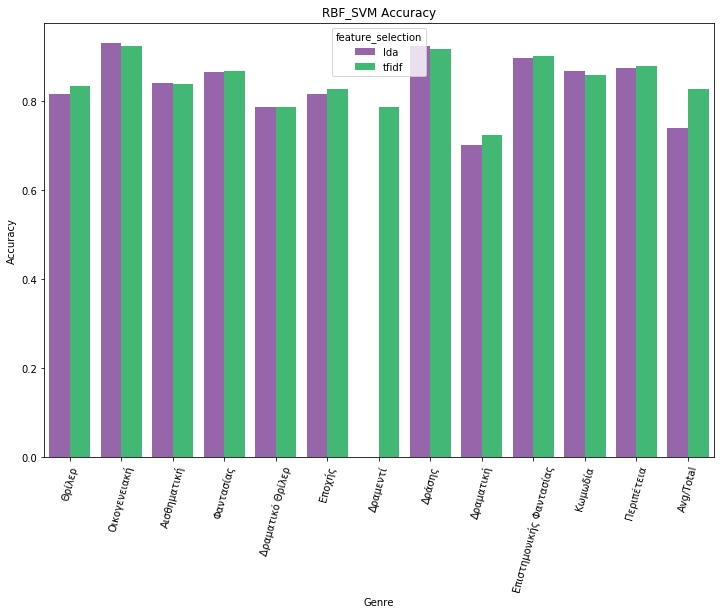

In [167]:
p = sns.barplot(data=RBF_SVM_tf_df, x = 'Genre', y='Accuracy',hue='feature_selection', palette=sns.set_palette([flatui[0],flatui[-1]])).set_title('RBF_SVM Accuracy')
plt.xticks(rotation=75)
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.savefig('RBF_SVM Accuracy')

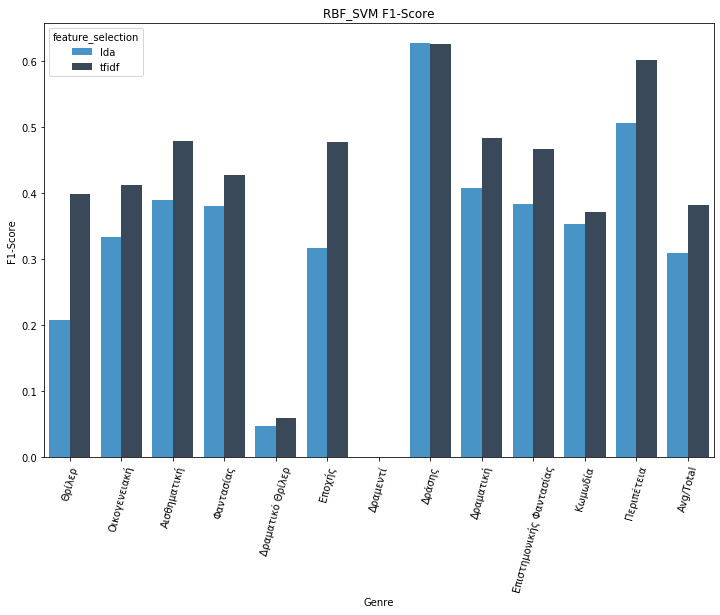

In [168]:
p = sns.barplot(data=RBF_SVM_tf_df, x = 'Genre', y='F1-Score',hue='feature_selection', palette=sns.set_palette([flatui[1],flatui[-2]]), ).set_title('RBF_SVM F1-Score')
plt.xticks(rotation=75)
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.savefig('RBF_SVM F1-Score')

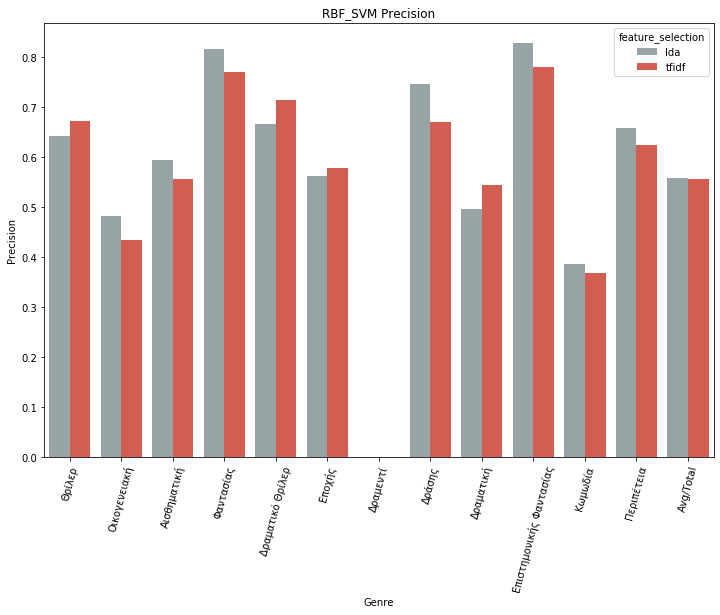

In [169]:
p = sns.barplot(data=RBF_SVM_tf_df, x = 'Genre', y='Precision',hue='feature_selection', palette=sns.set_palette([flatui[2],flatui[-3]])).set_title('RBF_SVM Precision')
plt.xticks(rotation=75)
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.savefig('RBF_SVM Precision')

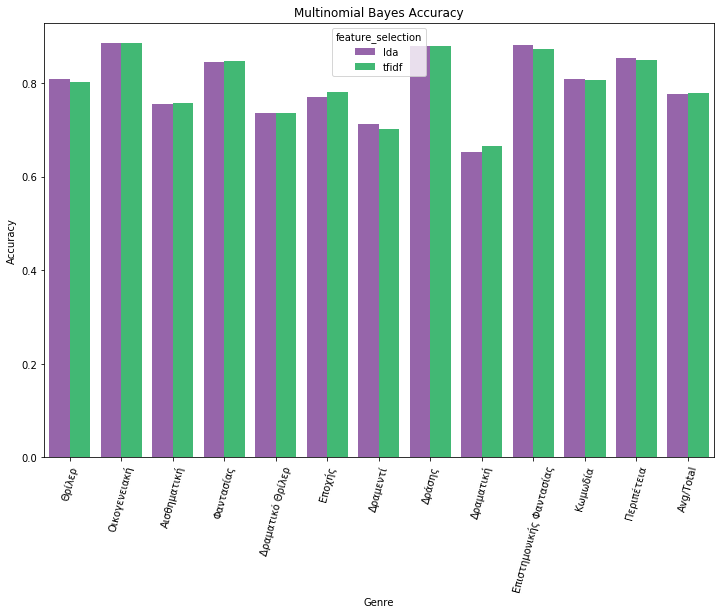

In [170]:
MultiBayes_df = results_df[(results_df['model']=='MultiBayes') ]
p = sns.barplot(data=MultiBayes_df, x = 'Genre', y='Accuracy',hue='feature_selection', palette=sns.set_palette([flatui[0],flatui[-1]])).set_title('Multinomial Bayes Accuracy')
plt.xticks(rotation=75)
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.savefig('MuiltiBayes Accuracy')

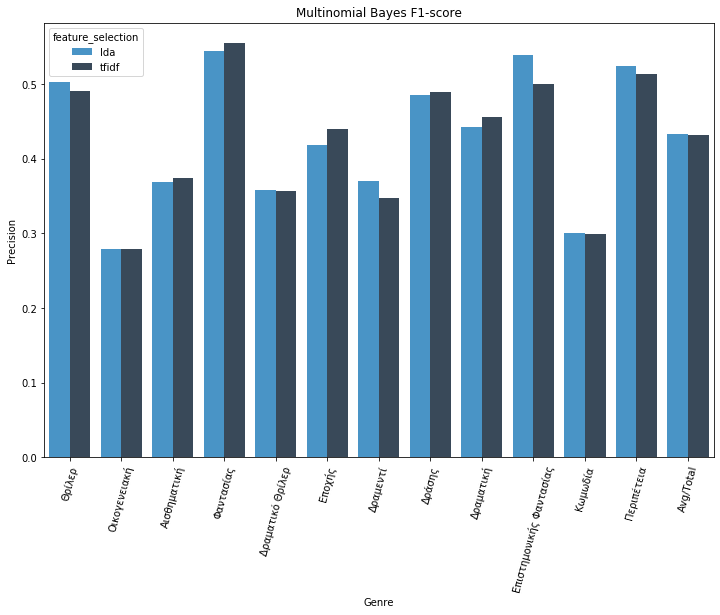

In [171]:
p = sns.barplot(data=MultiBayes_df, x = 'Genre', y='Precision',hue='feature_selection', palette=sns.set_palette([flatui[1],flatui[-2]])).set_title('Multinomial Bayes F1-score')
plt.xticks(rotation=75)
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.savefig('test')
plt.savefig('MuiltiBayes F1-score')

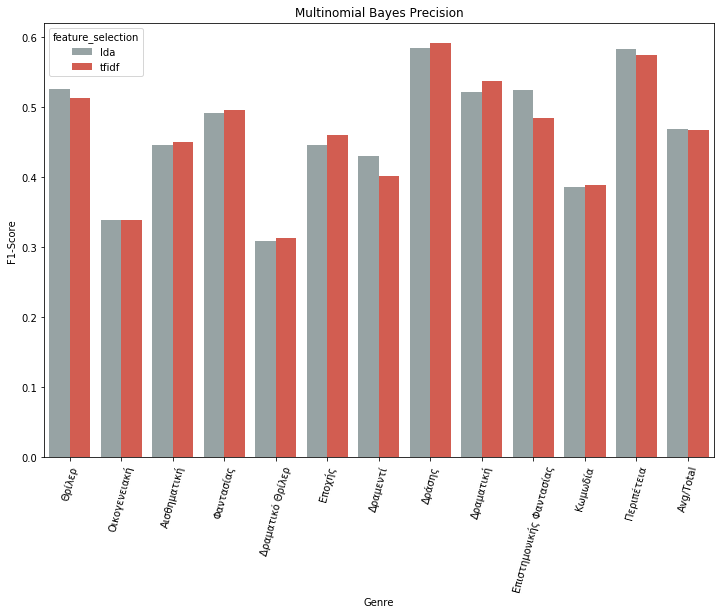

In [172]:
p = sns.barplot(data=MultiBayes_df, x = 'Genre', y='F1-Score',hue='feature_selection', palette=sns.set_palette([flatui[2],flatui[-3]])).set_title('Multinomial Bayes Precision')
plt.xticks(rotation=75)
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.savefig('MuiltiBayes Precision')